# Comparison of SP and 1RSB

In [8]:
using StaticArrays
include("../code/headers.jl")
include("../code/matrix_generator.jl")

valid_degrees (generic function with 2 methods)

In [3]:
# histogram for probability distr
function plotProb(p::AbstractArray, args...; kw...)
   pl = Plots.bar(collect(eachindex(p)), p.parent, args...; kw...) 
end

plotProb (generic function with 1 method)

# 1. At fixed rate

In [3]:
m = factorial(7)*2
R = 0.25
r = 1 - 3R
# r = 0.1
# R = (1-r)/3
n = round(Int, 3m/(2+r))
println("Fraction of degree 3 vars: ", r)
println("Rate ", R)
println("Size ", (m,n))

Fraction of degree 3 vars: 0.25
Rate 0.25
Size (10080, 13440)


In [4]:
Λ = OffsetVector([0,0,1-r,r], 0:3)
K = OffsetVector([0,0,0,1], 0:3)
nedges = 3m
# convert to edge degree convention to express the degree profile
lambda, rho = nodes2edges(Λ[1:end], K[1:end])
# build graph
H = ldpc_graphGF2(n,m,nedges,lambda,rho).H
x0 = rand((0,1), size(H,2))
s = (-1).^x0
J = 20
init=OffsetArray(MVector{2J+1}(fill(1/(2J+1),2J+1)), -J:J)
y = 0.2
sp = survey_propagation(H; field=copy(s), init, y=y);

Run SP

In [5]:
callback(t, ε, sp) = (println("$t $ε"); false)
iteration!(sp, maxiter=1000, damp=0.1, callback=callback, tol=1e-10)

1 0.10069934949456025
2 0.08660658102131907
3 0.10741567653716211
4 0.10489996635177502
5 0.08217796705914049
6 0.07879610493366829
7 0.08063456379664358
8 0.07969884582080017
9 0.08367069976155217
10 0.0869027635254892
11 0.08930180836890533
12 0.08672317842431077
13 0.0901763194880808
14 0.08888714140611353
15 0.08221188549763836
16 0.08094802629559672
17 0.07623211216784753
18 0.07449592745797134
19 0.06986128075219905
20 0.06386340499810333
21 0.055742264673282416
22 0.054672879204540226
23 0.04941264616347041
24 0.04128912976975596
25 0.0384646266746691
26 0.033608521802130475
27 0.03373390281533378
28 0.033647177501794245
29 0.031852768819288335
30 0.02882743405163335
31 0.0250590483553067
32 0.02271279986797481
33 0.020309022970437518
34 0.018109531575787097
35 0.015824431963184393
36 0.013591380214678317
37 0.012702079384099285
38 0.011582176369748343
39 0.011391350001375922
40 0.010877549573613698
41 0.009781630466445146
42 0.00966634502267194
43 0.009014621671005862
44 0.0079

328 1.831704099508613e-8
329 1.754637335427134e-8
330 1.6808129887913026e-8
331 1.6100947353159256e-8
332 1.5423519128532348e-8
333 1.4774592327349012e-8
334 1.4152968796921073e-8
335 1.3557499012328833e-8
336 1.2987083075621797e-8
337 1.2440666941060385e-8
338 1.191724030569219e-8
339 1.1415836387307365e-8
340 1.0935528704791864e-8
341 1.0475428524614472e-8
342 1.0034687747406679e-8
343 9.612489582089268e-9
344 9.208055318232766e-9
345 8.820637442674695e-9
346 8.449519195430355e-9
347 8.094015790938158e-9
348 7.753469644100619e-9
349 7.427251258462775e-9
350 7.114758449056069e-9
351 6.8154132337738815e-9
352 6.528662832572252e-9
353 6.253977002934619e-9
354 5.990848150894124e-9
355 5.738790553877493e-9
356 5.497337474125175e-9
357 5.266043490159689e-9
358 5.044480833049647e-9
359 4.832240274588173e-9
360 4.628929239913759e-9
361 4.434172695688687e-9
362 4.247609819429954e-9
363 4.06889666404453e-9
364 3.897702716137985e-9
365 3.733711562148301e-9
366 3.5766198891451495e-9
367 3.426137

9.668610356783347e-11

Run population dynamics

In [6]:
popsize=10^6
popP = fill(1/(2J+1), -J:J, 1:popsize)
popQ = fill(1/(2J+1), -J:J, 1:popsize);

In [7]:
ProgressMeter.ijulia_behavior(:clear)
popP, popQ = RSB(Λ,K; J=J, maxiter=10^2, popsize=popsize, y=y, popP=popP, popQ=popQ)

Progress: 100%|█████████████████████████████████████████| Time: 0:03:53
  err:  0.000694890876732468/5.0e-5


err = 0.000694890876732468


([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0… ; ], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 7.194e-321 0.0; 0.0 0.0 … 0.0 0.0… ; ])

Compare

In [8]:
avgP = mean(sp.P)
varP = mean(var(sp.P))
avgPopP = mean(popP, dims=2)[:,1]
varPopP = mean(var(popP, dims=2))
varP, varPopP

(0.004515844045823715, 0.004455984598513121)

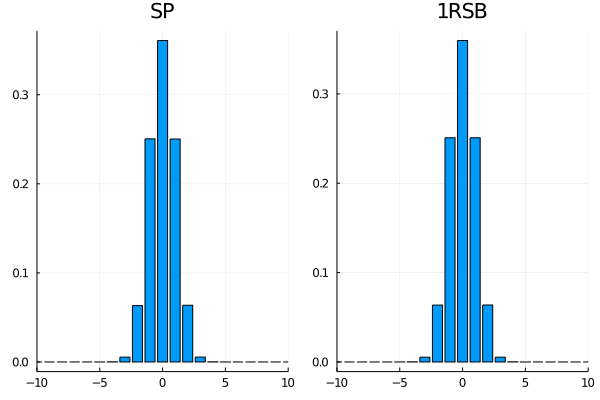

In [9]:
h1 = plotProb(avgP, title="SP", label="", xlim=(-10,10))
h2 = plotProb(avgPopP, title="1RSB", label="", xlim=(-10,10))
Plots.plot(h1,h2)

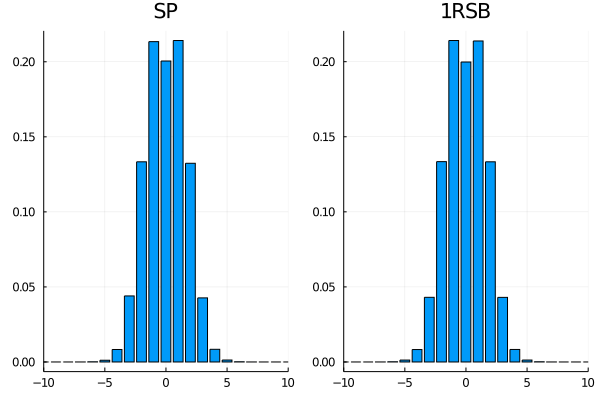

In [10]:
avgQ = mean(sp.Q)
varQ = mean(var(sp.Q))
avgPopQ = mean(popQ, dims=2)[:,1]
varPopQ = mean(var(popQ, dims=2))
varQ, varPopQ
h3 = plotProb(avgQ, title="SP", label="", xlim=(-10,10))
h4 = plotProb(avgPopQ, title="1RSB", label="", xlim=(-10,10))
Plots.plot(h3,h4)

## Overlap

In [11]:
o_sp, f_sp, c_sp = overlap(sp)

(0.5375750575199413, -0.5385985866881083, 0.00020470583363341177)

In [12]:
o_rsb, f_rsb, c_rsb = overlap1RSB(Λ,K; popP=popP, popQ=popQ, y=y, samples=10^6)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:39
  F:  -0.5374926899545567
  O:  0.5364452219304985
  D:  0.23177738903475076


(0.5364452219304985, -0.5374926899545567, 0.00020949360481163916)

# 2. Varying rate

In [ ]:
using Unzip
ProgressMeter.ijulia_behavior(:clear)
y = 0.5
J = 30

f3s = 0.4:0.01:0.6
f1 = 0.00
Rs=fill(NaN, eachindex(f3s))
D_sp=fill(NaN, eachindex(f3s))
D_rsb=fill(NaN, eachindex(f3s))

for (i,f3) in pairs(f3s)
    println("--- degree $i of $(length(f3s)): f1=$f1, f3 = $f3 ---")
    Λ = OffsetVector([0,f1,1-f1-f3,f3], 0:3)
    K = OffsetVector([0,0,0,1], 0:3)
    mK = sum(k*K[k] for k=eachindex(K))
    mΛ = sum(d*Λ[d] for d=eachindex(Λ))
    α = mΛ/mK
    R=1-α
    # Single instance
    n = 100*3*7
    nedges = Int(round(n*sum(i*l for (i,l) in pairs(Λ)), digits=8))
    m = Int(nedges/3)
    H = sparse(ldpc_matrix(n, m, nedges, Λ, K)')
    s = rand((-1,1), size(H,2))
    init = OffsetArray(MVector{2J+1}(fill(1/(2J+1),2J+1)), -J:J)
    sp = survey_propagation(H; field=s, init, y=y)
    iteration!(sp, maxiter=1000, damp=0.5, tol=1e-6)
    O = overlap(sp)[1]
    D_sp[i] = (1-O)/2
    # 1RSB
    popsize=10^6
    popP, popQ = RSB(Λ,K; J=J, maxiter=10^2, popsize=popsize, y=y)
    O,_,_ = overlap1RSB(Λ,K; popP=popP, popQ=popQ, y=y, samples=10^6)
    D_rsb[i] = (1-O)/2
    Rs[i] = R
end

Progress:  39%|████████████████                         |  ETA: 0:03:10
  err:  0.00025828691223361844/3.3333333333333335e-5

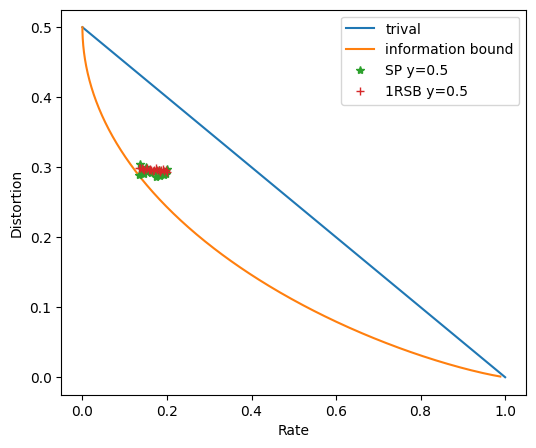

PyObject <matplotlib.legend.Legend object at 0x7f8180ccdf98>

In [18]:
using PyPlot
HH(p)=1+p*log2(p)+(1-p)*log2(1-p)
fig, ax = PyPlot.subplots(figsize=(6,5))
PyPlot.xlabel("Rate")
PyPlot.ylabel("Distortion")
PyPlot.plot((0,1),(0.5,0), label="trival")
PyPlot.plot(HH.(0:0.001:0.5), 0:0.001:0.5, label="information bound")
PyPlot.plot(Rs,D_sp, "*", label="SP y=$y")
PyPlot.plot(Rs,D_rsb, "+", label="1RSB y=$y")
# PyPlot.xlim((0.0,0.4))
# PyPlot.ylim((0.1,0.5))
legend()